### Malware Detector For CSI 467 Chapter 6
#### Examine the code to gain understanding of how the concepts of the capter are implemented in Python.

In [5]:
### Set up the directory to get the data.
###  PROVIDE THE PATH TO YOUR FILES
import os
path = 'C://Users//chase//Desktop//Notebooks'
files = os.listdir(path)
#for file in files:
 #   print (file)
os.chdir(path)

In [6]:
### Libraries to do the work
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [7]:
# Get the data file
data = pd.read_csv(r'Malwaredata.csv',engine='python')
data.drop(['Unnamed: 57','Machine','md5'], axis=1, inplace=True)    # drop 2 useless columns
data.dropna(axis=0, inplace=True)                                   #drop the 1 row with missing values
### view the first 5 rows
data.head()

,ID,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,1,224,8450,8.0,0,16896,8192,0,16947,4096,24576,4194304.0,4096,512,6,0,6,0,5,1,40960,1024,84427,2,320,262144,4096,1048576,4096,0,16,4,3.761598,2.446533,6.450720,6016.000000,1024,16896,6096.250000,960.0,16731,3,44,0,31,1,3.492126,3.492126,3.492126,864.0,864.0,864,72,0,1
1,2,224,258,9.0,0,84480,25600,0,10973,4096,90112,65536.0,4096,512,5,0,9,0,4,20,126976,1024,180181,9,320,65536,4096,1048576,4096,0,16,5,4.973822,3.269968,6.504334,22016.000000,1024,84480,21902.800000,992.0,84410,2,102,100,2,1,3.486827,3.486827,3.486827,892.0,892.0,892,72,0,1
2,3,224,8450,8.0,0,4608,3584,0,6452,4096,12288,264962048.0,4096,512,6,0,6,0,6,0,24576,1024,10208,2,320,262144,4096,1048576,4096,0,16,4,3.329824,0.278747,6.051986,1792.000000,512,4608,1708.000000,414.0,4294,2,27,0,3,1,3.517270,3.517270,3.517270,952.0,952.0,952,72,0,1
3,4,224,8450,10.0,0,108544,15872,0,105021,4096,114688,268435456.0,4096,512,6,1,8,0,6,1,143360,1024,165754,3,320,1048576,4096,1048576,4096,0,16,5,3.404831,0.160329,6.662718,24883.200000,512,108544,25645.400000,85.0,108180,12,66,0,105,2,3.270559,3.034188,3.506931,1032.0,972.0,1092,72,0,1
4,5,224,8226,48.0,0,513024,2048,0,520922,8192,524288,268435456.0,8192,512,4,0,0,0,6,0,540672,512,582537,3,34144,1048576,4096,1048576,4096,0,16,3,2.978056,0.101910,6.390683,171690.666667,512,513024,171265.333333,12.0,512736,1,1,0,0,1,3.420977,3.420977,3.420977,954.0,954.0,954,0,0,1


In [8]:
##  Get the number of rows and columns
data.shape

(216351, 55)

In [9]:
###  Create a training set with 80% and testing set with 20% of the data
X=data.copy()
y=X['legitimate']                ### this is the variable we are trying to predict 0=Benign, 1=malware
X.drop(['legitimate'], axis=1, inplace=True)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
def plot_confusion_matrix(cm, target_names,title='Confusion matrix',cmap=None,normalize=True):
    """ given a sklearn confusion matrix (cm), make a nice plot
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Logistic Regression

Predicted:  [43271     0]
True:  [28163 15108]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     28163
           1       0.00      0.00      0.00     15108

    accuracy                           0.65     43271
   macro avg       0.33      0.50      0.39     43271
weighted avg       0.42      0.65      0.51     43271



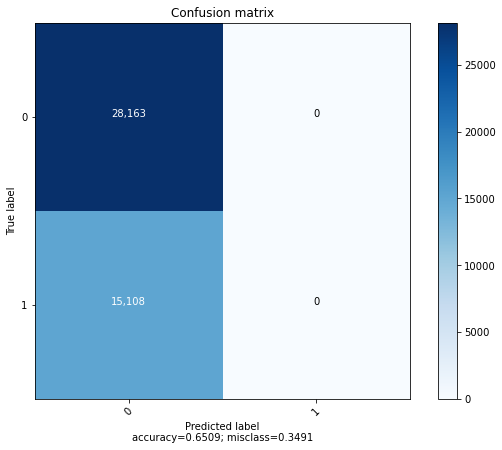

In [11]:
LR = LogisticRegression(random_state=0).fit(Xtrain, ytrain)
pred = LR.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))

plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

### K-Nearest Neighbors

Predicted:  [28105 15166]
True:  [28163 15108]


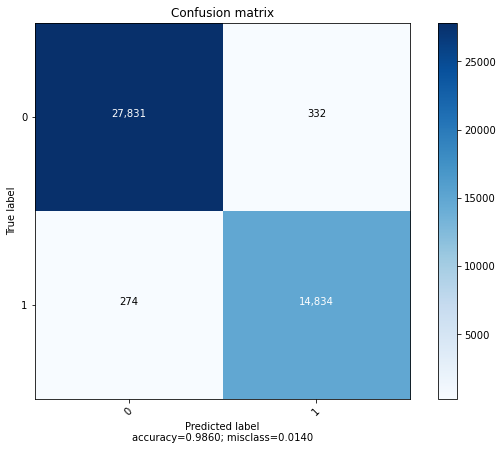

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28163
           1       0.98      0.98      0.98     15108

    accuracy                           0.99     43271
   macro avg       0.98      0.99      0.98     43271
weighted avg       0.99      0.99      0.99     43271



In [12]:
n_neighbors = 5
weights = 'distance'  #'uniform'
# we create an instance of Neighbours Classifier and fit the data.
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights).fit(Xtrain, ytrain)
pred = KNN.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))




Predicted:  [28088 15183]
True:  [28163 15108]


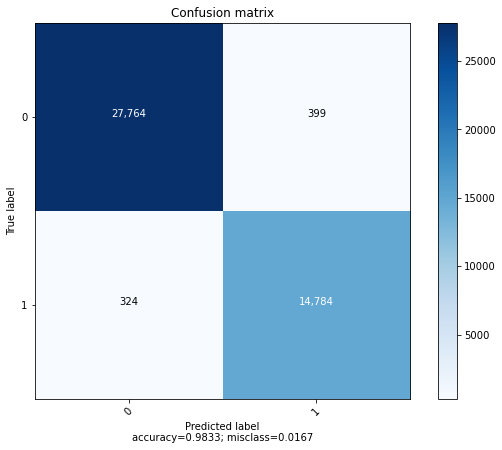

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28163
           1       0.97      0.98      0.98     15108

    accuracy                           0.98     43271
   macro avg       0.98      0.98      0.98     43271
weighted avg       0.98      0.98      0.98     43271



In [13]:
n_neighbors = 5
weights = 'uniform'  #'uniform'
# we create an instance of Neighbours Classifier and fit the data.
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights).fit(Xtrain, ytrain)
pred = KNN.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))



Predicted:  [28144 15127]
True:  [28163 15108]


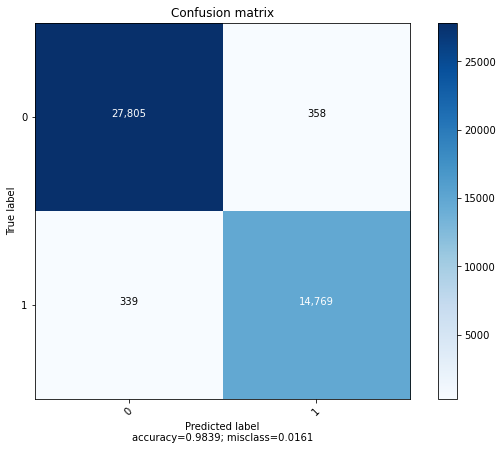

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28163
           1       0.98      0.98      0.98     15108

    accuracy                           0.98     43271
   macro avg       0.98      0.98      0.98     43271
weighted avg       0.98      0.98      0.98     43271



In [14]:
n_neighbors = 15
weights = 'distance'  #'uniform'
# we create an instance of Neighbours Classifier and fit the data.
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights).fit(Xtrain, ytrain)
pred = KNN.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))


Predicted:  [28081 15190]
True:  [28163 15108]


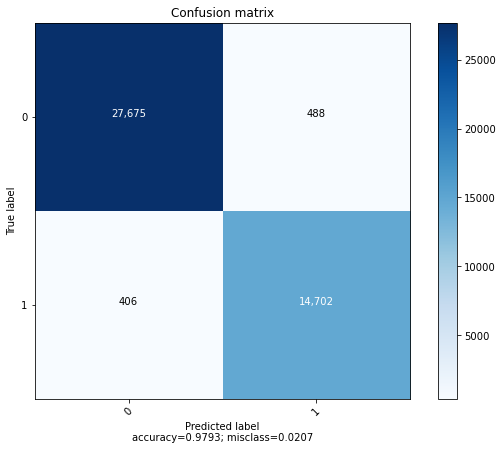

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     28163
           1       0.97      0.97      0.97     15108

    accuracy                           0.98     43271
   macro avg       0.98      0.98      0.98     43271
weighted avg       0.98      0.98      0.98     43271



In [15]:
n_neighbors = 15
weights = 'uniform'  #'uniform'
# we create an instance of Neighbours Classifier and fit the data.
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights).fit(Xtrain, ytrain)
pred = KNN.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))

Predicted:  [28211 15060]
True:  [28163 15108]


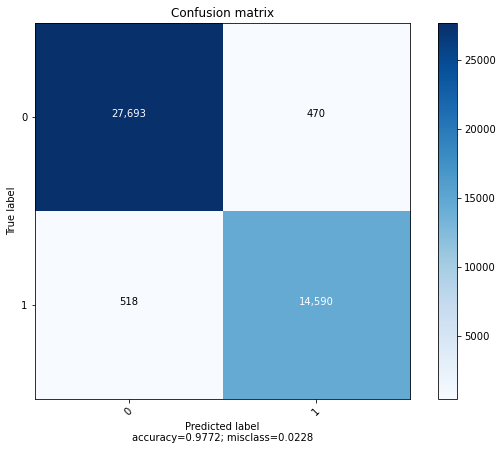

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     28163
           1       0.97      0.97      0.97     15108

    accuracy                           0.98     43271
   macro avg       0.98      0.97      0.97     43271
weighted avg       0.98      0.98      0.98     43271



In [16]:
n_neighbors = 100
weights = 'distance'  #'uniform'
# we create an instance of Neighbours Classifier and fit the data.
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights).fit(Xtrain, ytrain)
pred = KNN.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))

Predicted:  [28115 15156]
True:  [28163 15108]


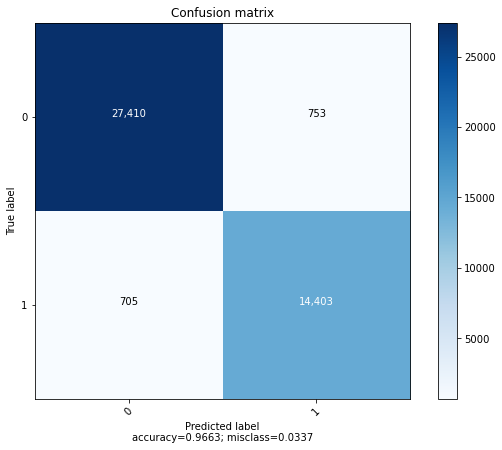

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28163
           1       0.95      0.95      0.95     15108

    accuracy                           0.97     43271
   macro avg       0.96      0.96      0.96     43271
weighted avg       0.97      0.97      0.97     43271



In [17]:

n_neighbors = 100
weights = 'uniform'  #'uniform'
# we create an instance of Neighbours Classifier and fit the data.
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights).fit(Xtrain, ytrain)
pred = KNN.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))

Predicted:  [28112 15159]
True:  [28163 15108]


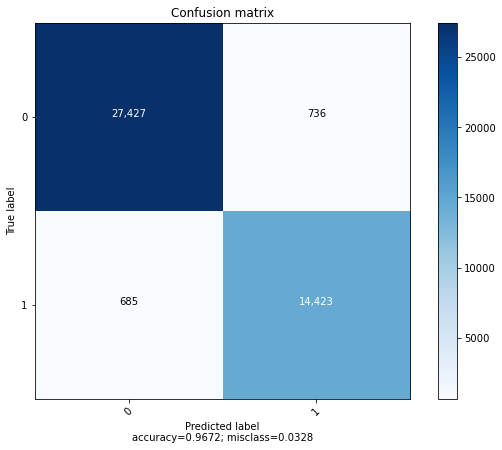

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     28163
           1       0.95      0.95      0.95     15108

    accuracy                           0.97     43271
   macro avg       0.96      0.96      0.96     43271
weighted avg       0.97      0.97      0.97     43271



In [18]:
n_neighbors = 500
weights = 'distance'  #'uniform'
# we create an instance of Neighbours Classifier and fit the data.
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights).fit(Xtrain, ytrain)
pred = KNN.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))

Predicted:  [27973 15298]
True:  [28163 15108]


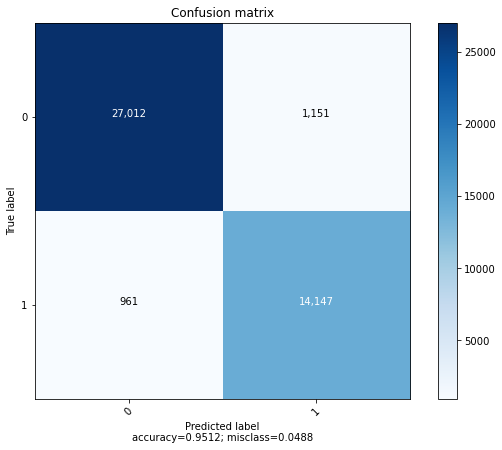

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     28163
           1       0.92      0.94      0.93     15108

    accuracy                           0.95     43271
   macro avg       0.95      0.95      0.95     43271
weighted avg       0.95      0.95      0.95     43271



In [19]:
n_neighbors = 500
weights = 'uniform'  #'uniform'
# we create an instance of Neighbours Classifier and fit the data.
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights).fit(Xtrain, ytrain)
pred = KNN.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))

### Decision Tree

Predicted:  [28170 15101]
True:  [28163 15108]


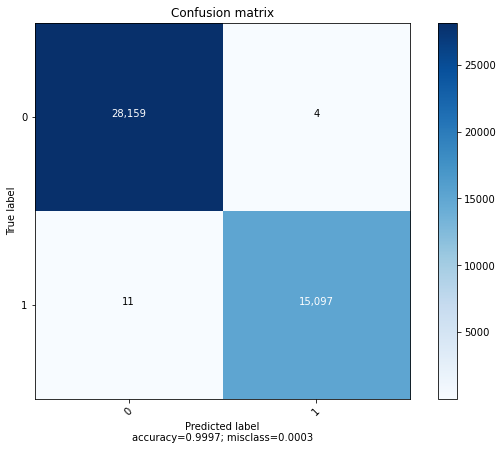

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28163
           1       1.00      1.00      1.00     15108

    accuracy                           1.00     43271
   macro avg       1.00      1.00      1.00     43271
weighted avg       1.00      1.00      1.00     43271



In [20]:
DT = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=20).fit(Xtrain, ytrain)
pred = DT.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))

Predicted:  [28165 15106]
True:  [28163 15108]


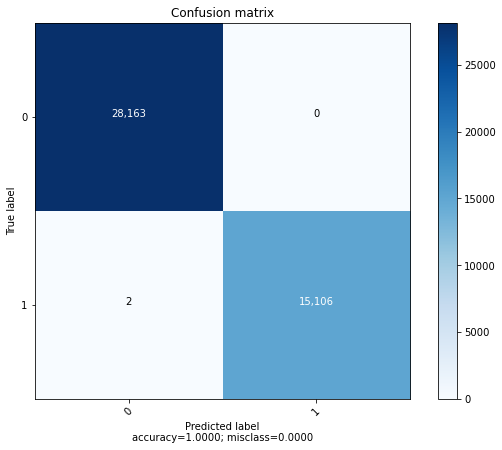

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28163
           1       1.00      1.00      1.00     15108

    accuracy                           1.00     43271
   macro avg       1.00      1.00      1.00     43271
weighted avg       1.00      1.00      1.00     43271



In [21]:
DT = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=20).fit(Xtrain, ytrain)
pred = DT.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))
plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))

### Random Forest

Predicted:  [28175 15096]
True:  [28163 15108]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28163
           1       1.00      1.00      1.00     15108

    accuracy                           1.00     43271
   macro avg       1.00      1.00      1.00     43271
weighted avg       1.00      1.00      1.00     43271



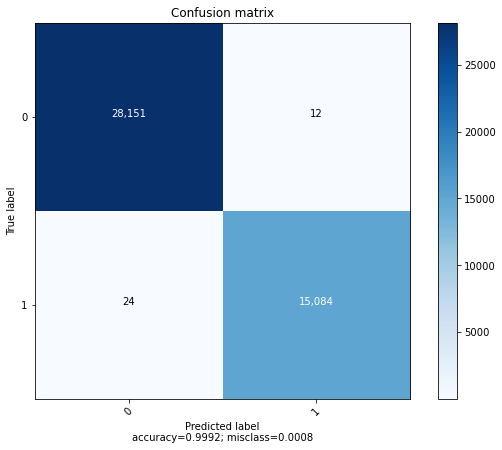

In [22]:
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RF.fit(Xtrain,ytrain)

pred = RF.predict(Xtest)
lab=[0,1]

mat = confusion_matrix(ytest, pred, labels=lab)
print("Predicted: ",np.sum(mat, axis=0))
print("True: ",np.sum(mat, axis=1))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred, labels=lab))

plot_confusion_matrix(mat,  lab,title='Confusion matrix',  cmap=None,  normalize=False)





Homework 8 3 Fold

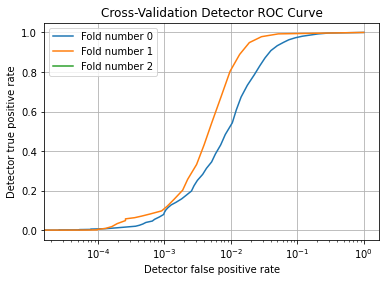

In [23]:
def Crossvalof3(X,y):
    import random
    from sklearn import metrics
    from matplotlib import pyplot
    from sklearn.model_selection import KFold
    X, y = np.array(X), np.array(y)
    fold_counter = 0
    kf = KFold(n_splits=3)
   # kf = KFold(n_splits=3, shuffle=True, random_state=0)
    for train, test in kf.split(X):
  #  for train, test in KFold(len(X),3,shuffle=True):
        training_X, training_y = X[train], y[train]
        test_X, test_y = X[test], y[test]
        
        classifier = RandomForestClassifier()
        classifier.fit(training_X,training_y)
        scores = classifier.predict_proba(test_X)[:,-1]
        fpr, tpr, thresholds = metrics.roc_curve(test_y, scores)
        pyplot.semilogx(fpr,tpr,label="Fold number {0}".format(fold_counter))
        fold_counter += 1

 


    
    pyplot.xlabel("Detector false positive rate")
    pyplot.ylabel("Detector true positive rate")
    pyplot.title("Cross-Validation Detector ROC Curve")
    pyplot.legend()
    pyplot.grid()
    pyplot.show()
Crossvalof3(X,y)

Homework 8 5 Fold

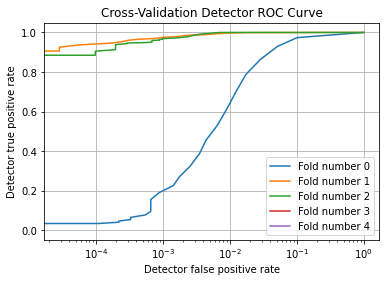

In [24]:
def Crossvalof5(X,y):
    import random
    from sklearn import metrics
    from matplotlib import pyplot
    from sklearn.model_selection import KFold
    X, y = np.array(X), np.array(y)
    fold_counter = 0
    kf = KFold(n_splits=5)
   # kf = KFold(n_splits=5, shuffle=True, random_state=0)
    for train, test in kf.split(X):
  #  for train, test in KFold(len(X),3,shuffle=True):
        training_X, training_y = X[train], y[train]
        test_X, test_y = X[test], y[test]
        
        classifier = RandomForestClassifier()
        classifier.fit(training_X,training_y)
        scores = classifier.predict_proba(test_X)[:,-1]
        fpr, tpr, thresholds = metrics.roc_curve(test_y, scores)
        pyplot.semilogx(fpr,tpr,label="Fold number {0}".format(fold_counter))
        fold_counter += 1

 


    
    pyplot.xlabel("Detector false positive rate")
    pyplot.ylabel("Detector true positive rate")
    pyplot.title("Cross-Validation Detector ROC Curve")
    pyplot.legend()
    pyplot.grid() 
    pyplot.show()
Crossvalof5(X,y)